In [7]:
#import libraries
# !pip install pandas seaborn numpy matplotlib and scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#load the dataset

df = pd.read_csv('Customers.csv')

#display the first few rows of the dataset
print("First five rows of the dataset:")
print(df.head())

#Display basic information about the dataset
print("\nDataset info:")
print(df.info())

#check for the missing values 
print("\nMissing values in dataset:")
print(df.isnull().sum())

First five rows of the dataset:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Custo

In [16]:
# Select relevent clunmns (eg, age, annual income, Spending Score)
# Select the correct columns for clustering
features = df[['Age', 'Annual Income ($)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the first 5 rows of the scaled data
print("\nFirst 5 rows of scaled features:")
print(scaled_features[:5])


First 5 rows of scaled features:
[[-1.05408932 -2.09350095 -0.42833854]
 [-0.98372287 -1.65613312  1.07554599]
 [-1.0189061  -0.54084515 -1.6099621 ]
 [-0.91335643 -1.13129172  0.93231889]
 [-0.63189066 -1.59052794 -0.39253176]]


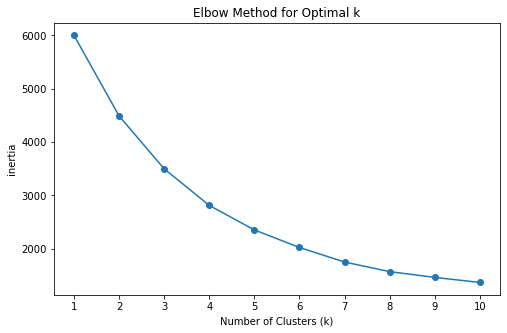

In [20]:
#Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
    
#plot the Elbow method graph

plt.figure(figsize=(8,5))
plt.plot(k_range,inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('inertia')
plt.xticks(k_range)
plt.show()

In [21]:
#perform K-mean clusterng with the optimal k (from the elbow method, assume k=3 here)

optimal_k = 3
Kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

#Add cluster label to the orginal dataset
df['cluster'] = cluster_labels

#Display the first few rows with cluster labels
print("\nFirst 5 rows with cluster label:")
print(df.head())


First 5 rows with cluster label:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  cluster  
0     Healthcare                1            4        0  
1       Engineer                3            3        5  
2       Engineer                1            1        7  
3         Lawyer                0            2        5  
4  Entertainment                2            6        0  


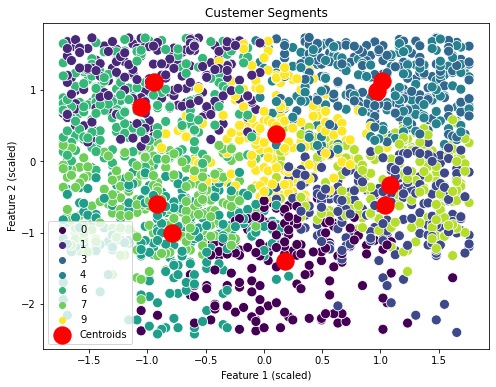

In [30]:
#visualize cluster (using the first two features for plotting)
plt.figure(figsize=(8,6))
sns.scatterplot(x=scaled_features[:,0], y=scaled_features[:,1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids')
plt.title('Custemer Segments')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()